# 1. Load & visualize the data

In [ ]:
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pdb
# if you need, you can use other libraries


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cuirie_0612_3.txt to cuirie_0612_3.txt


In [ ]:
a = '1 2 3'
b = list(a.split())
print(b)
for j in b:
  print(float(j))

['1', '2', '3']
1.0
2.0
3.0


In [ ]:
f = open('cuirie_0612_3.txt', 'r', encoding='utf-8')
reader=csv.reader(f)
x = []
y = []

for i, row in enumerate(reader) :
  #pdb.set_trace()
  tmp = list(row[0].split())
  #print(tmp)
  x.append(float(tmp[0]))
  y.append(tmp[1:])
#x = x[:9]
#y = y[:9]
y = [[abs(float(k)) for k in Temp] for Temp in y]

[51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4]
15


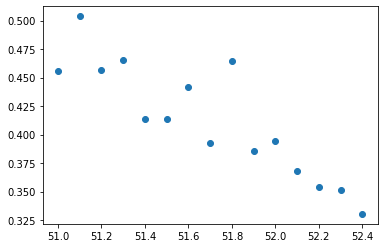

In [ ]:
aver_y = [np.mean([y[i]]) for i in range(len(x))]
print(x)
print(len(aver_y))
plt.scatter(x, aver_y)

In [ ]:
print(len(y[0]))

50


# 2. Implement Chi_square_minimization algorithm

In [ ]:
# Define Cost function J
def cost(x, average, theta, inv):
    # Compute cost for linear regression
    # J is the cost using theta as the parameter for linear regression to fit the data points in X and y

    dif = np.zeros((1,len(x)))
    dif_t = np.zeros((len(x),1))
    
    for i in range(len(x)):
      tmp=sqrt(theta[0]*(1 - x[i]/theta[1]))
      dif[0][i] = average[i] - tmp
      dif_t[i][0] = dif[0][i]
    
    J = np.matmul(dif, np.matmul(inv, dif_t))
    return J[0][0]


In [ ]:
len(x)

15

In [ ]:
    dif = np.ones((1,7))
    dif_t = np.ones((7,1))
    dif[0][2] = 3
    dif_t[2] = 5
    b = np.matmul(dif, dif_t)
    print(b[0][0])

21.0
[[21.]]


In [ ]:
# Implement Gradient descent algorithm
def gradient_descent(x, average, theta, alpha, num_iters, inv):
    # gradient_descent Performs gradient descent to learn theta
    # gradient_descent updates theta by taking num_iters gradient steps with learning rate alpha
    
    for iter in range(num_iters):
        s=[0,0]
        rounda = np.zeros((1, len(x)))
        roundb = np.zeros((1, len(x)))
        dif_t = np.zeros((len(x),1))

        for i in range(len(x)):
          dif_t[i][0] = sqrt(theta[0]*(1-x[i]/theta[1])) - average[i]
          rounda[0][i] = sqrt(1-x[i]/theta[1])/2/sqrt(theta[0])
          roundb[0][i] = sqrt(theta[0])*x[i]/2/sqrt(1-x[i]/theta[1])/(theta[1]**2)
        ###################################################################################
        s[0] = 2*np.matmul(rounda, np.matmul(inv, dif_t))[0][0]
        s[1] = 2*np.matmul(roundb, np.matmul(inv, dif_t))[0][0]

        theta[0]-=alpha*s[0]
        theta[1]-=alpha*s[1]
        if theta[1]<max(x):
          print("err")
          theta[1] = max(x)
        ###################################################################################
          
            
        ################################################w###################################
        #                                  END OF YOUR CODE                               #
        ###################################################################################

        # Save the cost J in every iteration    
        J = cost(x, average, theta, inv)
        #print("i, theta", iter, theta, J)
        
        if (iter+1)%30000 is 0:
            print('cost at %d iterations : %f, theta : %f %f' %(iter+1, J, theta[0], theta[1]))
            
    return theta

In [ ]:
N = len(x)
###################################################################################
average = np.zeros((50,N))
covariance = np.zeros((50, N, N))
theta = np.zeros((50,2))
ki_square = np.zeros(50)
dif = np.zeros((1,N))
dif_t = np.zeros((N,1))

for out in range(50):
  print('out : ', out)
  for i in range(N):
    s = 0
    for j in range(50):
      if j==out:
        continue
      s += y[i][j]
    average[out][i] = s/49
  #plt.scatter(x, average[out])
  #pdb.set_trace()
  for i in range(N):
    for j in range(N):
      sum = 0
      for k in range(50):
        if k==out:
          continue
        sum += (y[i][k] - average[out][i])*(y[j][k] - average[out][j])
      covariance[out][i][j] = sum/(49*48)
  #print("cov", covariance[out])

  cov_inv = np.linalg.inv(covariance[out])
  num_iters = 300000
  alpha = 0.00001
  theta[out] = [4.5, 53.6]
  # compute initial cost
  init_J = cost(x, average[out], theta[out], cov_inv)
  print('initial cost : %f' %init_J)

  # excute gradient descent
  theta[out] = gradient_descent(x, average[out], theta[out], alpha, num_iters, cov_inv)

  # compute new cost
  new_J = cost(x, average[out], theta[out], cov_inv)
  for i in range(N):
    dif[0][i] = average[out][i] - sqrt(theta[out][0]*(1 - x[i]/theta[out][1]))
    dif_t[i][0] = dif[0][i]
  ki_square[out] = np.matmul(dif, np.matmul(cov_inv, dif_t))[0][0]

  print('updated theta : ', theta[out])
  print('updated cost : %f' %new_J)

#def cost(x, average, theta, inv):
#def gradient_descent(x, average, theta, alpha, num_iters, inv)

#data_x, data_y = x,y
###################################################################################
#                                  END OF YOUR CODE                               #
###################################################################################


out :  0
initial cost : 52.694723
cost at 30000 iterations : 33.845764, theta : 4.954362 53.590175
cost at 60000 iterations : 33.837104, theta : 4.994340 53.574610
cost at 90000 iterations : 33.837020, theta : 4.998268 53.573095
cost at 120000 iterations : 33.837020, theta : 4.998651 53.572947
cost at 150000 iterations : 33.837020, theta : 4.998689 53.572933
cost at 180000 iterations : 33.837020, theta : 4.998692 53.572932
cost at 210000 iterations : 33.837020, theta : 4.998693 53.572931
cost at 240000 iterations : 33.837020, theta : 4.998693 53.572931
cost at 270000 iterations : 33.837020, theta : 4.998693 53.572931
cost at 300000 iterations : 33.837020, theta : 4.998693 53.572931
updated theta :  [ 4.99869286 53.57293137]
updated cost : 33.837020
out :  1
initial cost : 50.330884
cost at 30000 iterations : 30.062922, theta : 5.040492 53.559974
cost at 60000 iterations : 30.052601, theta : 5.083642 53.543690
cost at 90000 iterations : 30.052525, theta : 5.087358 53.542302
cost at 1200

In [ ]:
theta

array([[ 4.99869286, 53.57293137],
       [ 5.08770601, 53.54217208],
       [ 5.02016186, 53.57942524],
       [ 5.13759294, 53.52450214],
       [ 5.11356455, 53.54307498],
       [ 5.1351765 , 53.54871487],
       [ 5.08116076, 53.53439775],
       [ 5.17898613, 53.51000902],
       [ 5.10531412, 53.53643327],
       [ 5.02164436, 53.62364212],
       [ 4.78199878, 53.65409702],
       [ 5.07978604, 53.53654774],
       [ 5.25292183, 53.46437065],
       [ 5.16386744, 53.51727913],
       [ 5.07989003, 53.53854416],
       [ 5.0316146 , 53.56477419],
       [ 5.18674447, 53.50842114],
       [ 5.19018886, 53.50072871],
       [ 5.2508493 , 53.48184242],
       [ 5.18310604, 53.50366208],
       [ 5.05335054, 53.55762205],
       [ 4.99916974, 53.57548205],
       [ 5.19843477, 53.50304341],
       [ 5.13527325, 53.5131133 ],
       [ 4.95294642, 53.59394873],
       [ 5.16821537, 53.5220648 ],
       [ 4.98705742, 53.56046276],
       [ 5.00957567, 53.55875581],
       [ 4.93972972,

In [ ]:
ki_square

array([33.8370196 , 30.05252417, 30.76743103, 30.20451725, 32.64960569,
       32.44838156, 30.8438117 , 30.72787541, 30.02106513, 39.91588004,
       38.81160365, 31.36070008, 38.0249471 , 31.11187457, 30.7575989 ,
       30.42042354, 31.90010976, 30.37288082, 30.50923711, 30.63535481,
       30.92520914, 32.76520195, 30.53296654, 33.3110862 , 31.86218756,
       30.95166782, 32.78320564, 39.11714239, 35.17825049, 31.5697579 ,
       33.93005269, 30.86575235, 30.81902737, 33.54103638, 34.20546401,
       30.09702002, 32.6951599 , 30.09300476, 30.29218082, 30.02043271,
       30.04818358, 31.8981926 , 30.26083313, 30.17740647, 31.31477866,
       35.04969091, 35.98588468, 32.16286416, 31.41500056, 30.17787666])

In [ ]:
theta_aver = np.zeros(2)
theta_err = np.zeros(2)
theta_sum = np.zeros(2)

for i in range(2):
  tmp = 0
  for j in range(50):
    tmp += theta[j][i]
  theta_aver[i] = tmp/50

for i in range(2):
  tmp = 0
  for j in range(50):
    tmp += (theta_aver[i] - theta[j][i])**2
  theta_err[i] = sqrt(49/50*tmp)

print("theta_average : ", theta_aver)
print("theta_err : ", theta_err)

tmp = 0
for i in range(50):
  tmp += ki_square[i]
ki_aver = tmp/50
dof = N-2 #degree of freedom. 9-2=7

tmp = 0
for i in range(50):
  tmp += (ki_aver/dof - ki_square[i]/dof)**2
ki_err = sqrt(49/50*tmp)

print("chi_square/dof : ", ki_aver/dof)
print("chi/dof_err : ", ki_err)



theta_average :  [ 5.10810816 53.53663584]
theta_err :  [0.70943175 0.27939888]
chi_square/dof :  2.476029784547073
chi/dof_err :  1.342887395519544


# 3. Plot the linear regression fit

[51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4]
[0.45583999999999997, 0.50384, 0.4562800000000001, 0.4652400000000001, 0.4134399999999999, 0.41408000000000006, 0.4414, 0.39232, 0.4649999999999999, 0.38543999999999995, 0.39452000000000004, 0.3683600000000001, 0.35436, 0.35168, 0.33043999999999996]
30


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


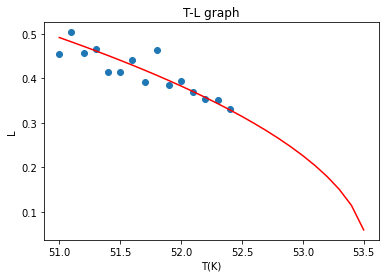

In [ ]:
# Plot the scatter plot and linear regression fit

###################################################################################
aver_y = [np.mean([y[i]]) for i in range(len(x))]
print(x)
print(aver_y)

plt.xlabel('T(K)')
plt.ylabel('L')
plt.title('T-L graph')
plt.scatter(x, aver_y)
new_x=np.arange(min(x),54,0.1)
print(len(new_x))
nx=len(new_x)
import pdb
#pdb.set_trace()
#new_y=new_x*(theta[1]*np.ones(len(new_x)))+(theta[0]*np.ones(len(new_x)))
new_y = np.sqrt(theta_aver[0]*(np.ones(nx) - new_x/theta_aver[1]))
plt.plot(new_x,new_y,'r')

